# Modeling recruitment time series from 'astsa' package as an AR process

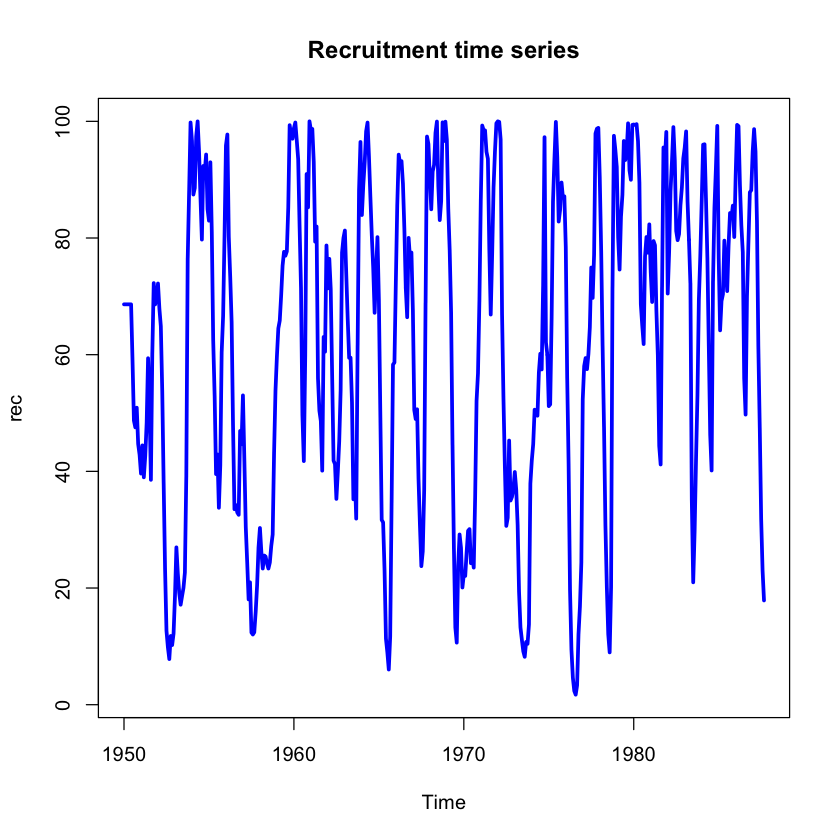

In [12]:
library(astsa)
my.data=rec

# Plot rec 
plot(rec, main='Recruitment time series', col='blue', lwd=3)

In [19]:
# subtract mean to get a time series with mean zero
ar.process=my.data-mean(my.data)

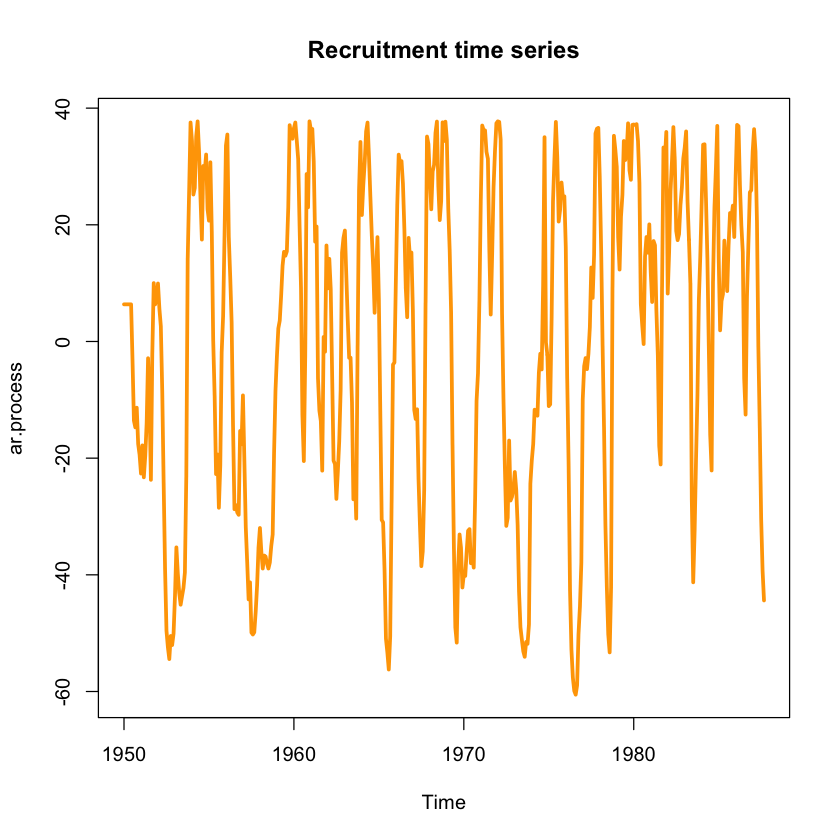

In [21]:
# Plot rec 
plot(ar.process, main='Recruitment time series', col='orange', lwd=3)

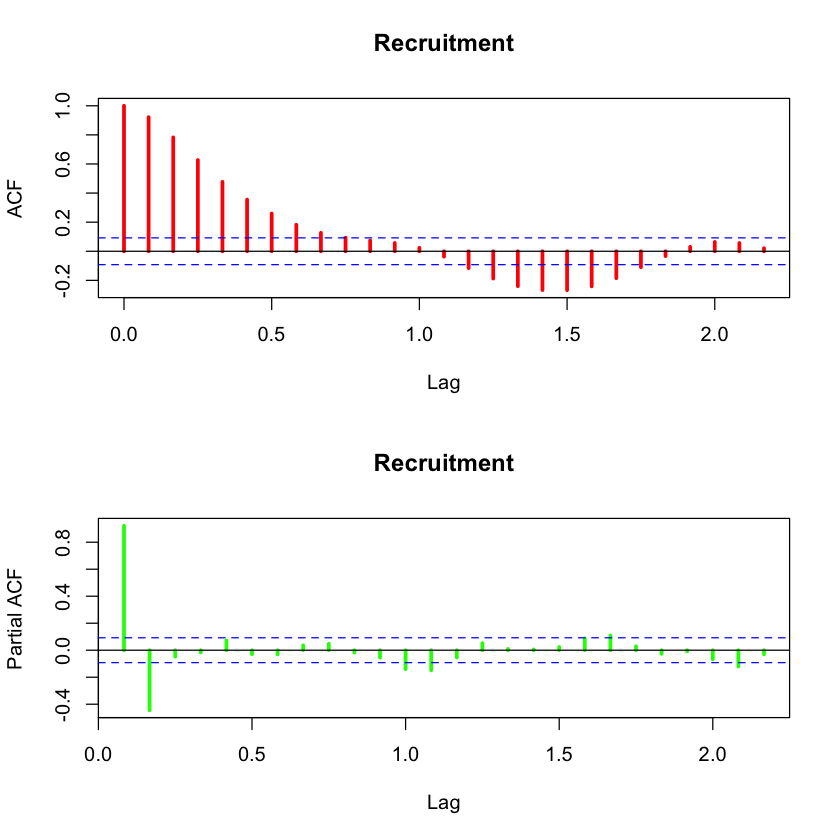

In [22]:


# ACF and PACF of the process
par(mfrow=c(2,1))
acf(ar.process, main='Recruitment', col='red', lwd=3)
pacf(ar.process, main='Recruitment', col='green', lwd=3)

In [3]:
# order
p=2

# sample autocorreleation function r
r=NULL
r[1:p]=acf(ar.process, plot=F)$acf[2:(p+1)]
cat('r=',r,'\n')

r= 0.9218042 0.7829182 


In [4]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 2 by 2, with entries all 1's.

# define non-diagonal entires of R
for(i in 1:p){
	for(j in 1:p){
		if(i!=j)
			R[i,j]=r[abs(i-j)]
		}
	}
R

1.0000000,0.9218042
0.9218042,1.0000000


In [5]:
# b-column vector on the right
b=NULL
b=matrix(r,p,1)# b- column vector with no entries
b

0.9218042
0.7829182


In [7]:
# solve(R,b) solves Rx=b, and gives x=R^(-1)b vector
phi.hat=NULL
phi.hat=solve(R,b)[,1]
phi.hat


[1]  1.3315874 -0.4445447

In [8]:
#variance estimation using Yule-Walker Estimator
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
c0

[1] 780.991

In [9]:
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 94.17131

In [10]:
# constant term in the model
phi0.hat=mean(my.data)*(1-sum(phi.hat))
phi0.hat

[1] 7.033036

In [11]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 7.033036  Coeffcinets: 1.331587 -0.4445447  and Variance: 94.17131 


In [23]:
acf(ar.process, main='Recruitment', col='red', lwd=3, plot=F)
pacf(ar.process, main='Recruitment', col='green', lwd=3, plot=F)


Autocorrelations of series ‘ar.process’, by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.922  0.783  0.627  0.477  0.355  0.259  0.182  0.127  0.094  0.074 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 
 0.057  0.024 -0.037 -0.116 -0.188 -0.240 -0.267 -0.268 -0.241 -0.185 -0.110 
1.8333 1.9167 2.0000 2.0833 2.1667 
-0.033  0.030  0.064  0.057  0.021 


Partial autocorrelations of series ‘ar.process’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 0.9167 
 0.922 -0.445 -0.048 -0.016  0.073 -0.029 -0.031  0.036  0.048 -0.018 -0.055 
1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 1.5000 1.5833 1.6667 1.7500 1.8333 
-0.140 -0.149 -0.054  0.052  0.010  0.006  0.024  0.087  0.109  0.029 -0.027 
1.9167 2.0000 2.0833 2.1667 
-0.008 -0.068 -0.120 -0.030 